## 1. Notebook Initialization

In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from random import randint

In [2]:
# Opciones de pandas
rows, cols = 400, 100
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas
PATH = "../../data/fundamental_data/"

## 2. Preliminar Tests

In [3]:
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
#data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m'), inplace=True)
data

,FCF,PricePerShare,ROE,Prediction
1985-03,-1.232322,-1.079314,-0.669004,13.035309
1985-06,-1.232322,-1.084088,-0.669004,13.160484
1985-09,-1.232322,-1.081432,-0.669004,16.657703
1985-12,-1.232322,-1.007231,-0.669004,16.345213
1986-03,-1.232322,-1.013861,-0.669004,15.921562
1986-06,-1.232322,-1.022850,-0.669004,14.741072
1986-09,-1.232322,-1.047896,-0.669004,13.267827
1986-12,-1.232322,-1.079154,-0.669004,16.734827
1987-03,-1.232322,-1.005595,-0.669004,18.234604
1987-06,-1.232322,-0.973774,-0.669004,17.033018


## 2.1 No scaled y dataset evaluation

In [6]:
from lib.fundamental_lib import param_tuner
from sklearn.model_selection import ShuffleSplit
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
rf = GridSearchCV(RandomForestRegressor(bootstrap=True, n_jobs=-1, random_state=2021), n_jobs=-1, cv=cv,
                  param_grid = {
                        'n_estimators': [10, 20, 30, 40, 50, 100],
                        'max_depth': [3, None],
                        'max_features': ['auto', 'sqrt', 'log2'],
                        'oob_score': [True, False],
                        'min_samples_leaf': [1,2,3,4],
                      },
                  scoring='neg_root_mean_squared_error'
)
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
print(param_tuner(data,rf,scaling=False))

{'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 20, 'oob_score': True}


In [36]:
from lib.fundamental_lib import evaluate_estimator
from sklearn.model_selection import ShuffleSplit
Params={'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 40, 'oob_score': False}
rf = RandomForestRegressor(bootstrap=True, n_jobs=-1, max_depth=Params['max_depth'], random_state=2021, min_samples_leaf=Params['min_samples_leaf'], max_features=Params['max_features'], n_estimators=Params['n_estimators'], oob_score=Params['oob_score'])
cv = ShuffleSplit(n_splits=10, test_size=0.2)
evaluate_estimator('{}_Manual_dataset.csv', PATH, rf, cv=cv, scaling=False)

NSC
neg_mean_absolute_percentage_error
	mean: 0.2805295961758915	 std:0.07763182228283834


NSC
neg_root_mean_squared_error
	mean: 9.177552204426176	 std:3.585132198126173


GL
neg_mean_absolute_percentage_error
	mean: 0.1886750514130155	 std:0.06500402625708387


GL
neg_root_mean_squared_error
	mean: 4.013513418405867	 std:1.0486013256638056


PEP
neg_mean_absolute_percentage_error
	mean: 0.26448268481877446	 std:0.04307325242761302


PEP
neg_root_mean_squared_error
	mean: 5.307092543160939	 std:1.1244956708263767


BDX
neg_mean_absolute_percentage_error
	mean: 0.18038186190645783	 std:0.05031232675910286


BDX
neg_root_mean_squared_error
	mean: 9.369426570878945	 std:1.4476155376590394


IBM
neg_mean_absolute_percentage_error
	mean: 0.13103389525335626	 std:0.014296060342232356


IBM
neg_root_mean_squared_error
	mean: 8.701376962319632	 std:0.9963761061524025


MEAN MAPE: 0.2090206179134991
	 STD: 0.050063497613774086
MEAN RMSE: 7.3137923398383125
	 STD: 1.6404441676855595


## 2.2 Scaled y dataset evaluation

In [7]:
from lib.fundamental_lib import param_tuner
from sklearn.model_selection import ShuffleSplit
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
rf = GridSearchCV(RandomForestRegressor(bootstrap=True, n_jobs=-1, random_state=2021), n_jobs=-1, cv=cv,
                  param_grid = {
                        'n_estimators': [10, 20, 30, 40, 50, 100],
                        'max_depth': [3, None],
                        'max_features': ['auto', 'sqrt', 'log2'],
                        'oob_score': [True, False],
                        'min_samples_leaf': [1,2,3,4],
                      },
                  scoring='neg_root_mean_squared_error'
)
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
print(param_tuner(data,rf,scaling=True))

{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 40, 'oob_score': True}


In [24]:
from lib.fundamental_lib import evaluate_estimator
from sklearn.model_selection import ShuffleSplit
Params={'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 40, 'oob_score': False}
rf = RandomForestRegressor(bootstrap=True, n_jobs=-1, max_depth=Params['max_depth'], random_state=2021, min_samples_leaf=Params['min_samples_leaf'], max_features=Params['max_features'], n_estimators=Params['n_estimators'], oob_score=Params['oob_score'])
cv = ShuffleSplit(n_splits=10, test_size=0.2)
evaluate_estimator('{}_Manual_dataset.csv', PATH, rf, cv=cv, scaling=True)

NSC
neg_mean_absolute_percentage_error
	mean: 0.3285067978509337	 std:0.13127702413830122


NSC
neg_root_mean_squared_error
	mean: 0.18458165902617582	 std:0.06767595316338051


GL
neg_mean_absolute_percentage_error
	mean: 0.3291454738707022	 std:0.203143778797168


GL
neg_root_mean_squared_error
	mean: 0.14092196810783875	 std:0.04307193025303331


PEP
neg_mean_absolute_percentage_error
	mean: 0.3526014022863243	 std:0.15997218123970247


PEP
neg_root_mean_squared_error
	mean: 0.140625263316177	 std:0.014912550503017149


BDX
neg_mean_absolute_percentage_error
	mean: 0.38293972154852884	 std:0.23669274077985897


BDX
neg_root_mean_squared_error
	mean: 0.11741993850412406	 std:0.02241642153878812


IBM
neg_mean_absolute_percentage_error
	mean: 0.3958878731136724	 std:0.27689064466739094


IBM
neg_root_mean_squared_error
	mean: 0.16196495678549855	 std:0.028120537567247146


MEAN MAPE: 0.35781625373403225
	 STD: 0.20159527392448431
MEAN RMSE: 0.14910275714796284
	 STD: 0.035239478605093

## 3.0 Model testing settings

In [4]:
from lib.fundamental_lib import make_dict
datas = make_dict('{}_Manual_dataset.csv', PATH)

## 3.1 Random split - No scaled prediction variable

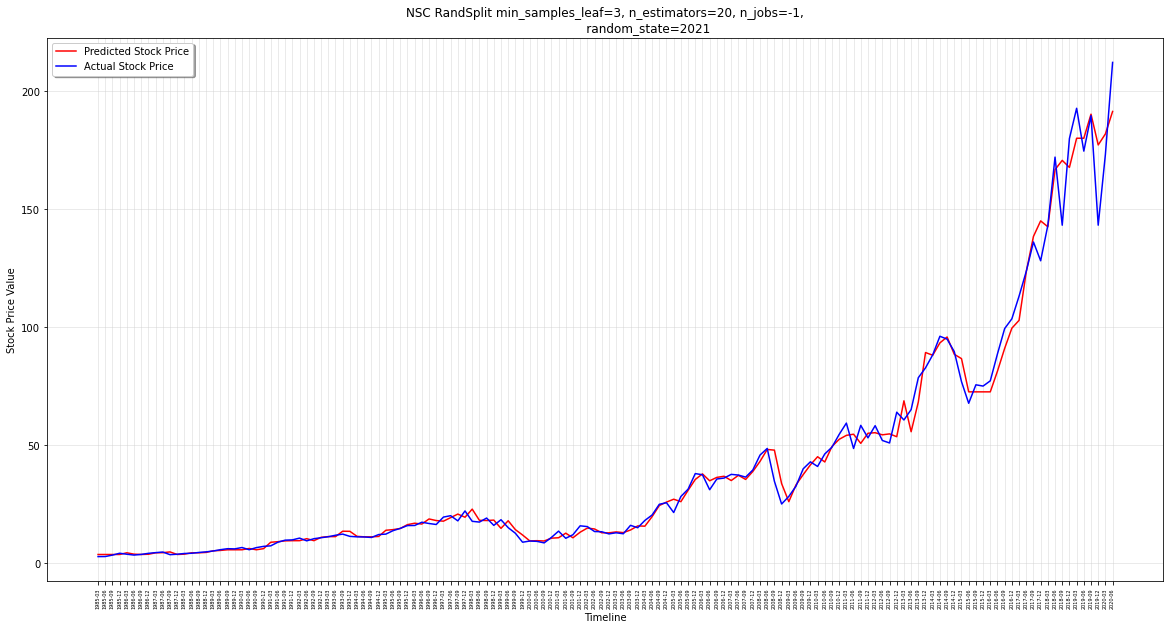

NSC MODEL RESULTS
 RMSE
 	Test: 4.714783164937445
 MAPE
 	Test: 0.12111505093409367
 MAE
 	Test: 3.157207330007094
 R2 Score Adj
 	Test: 0.9876694177180031



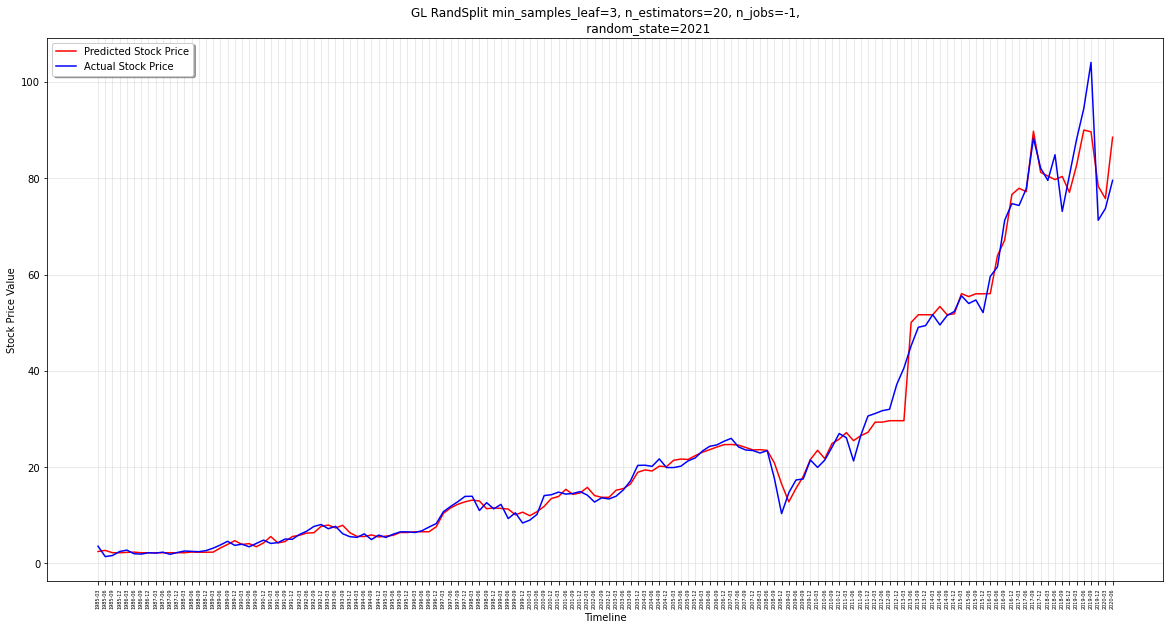

GL MODEL RESULTS
 RMSE
 	Test: 3.1289257897494434
 MAPE
 	Test: 0.13517618974711038
 MAE
 	Test: 1.9952035776344346
 R2 Score Adj
 	Test: 0.9815729364580191



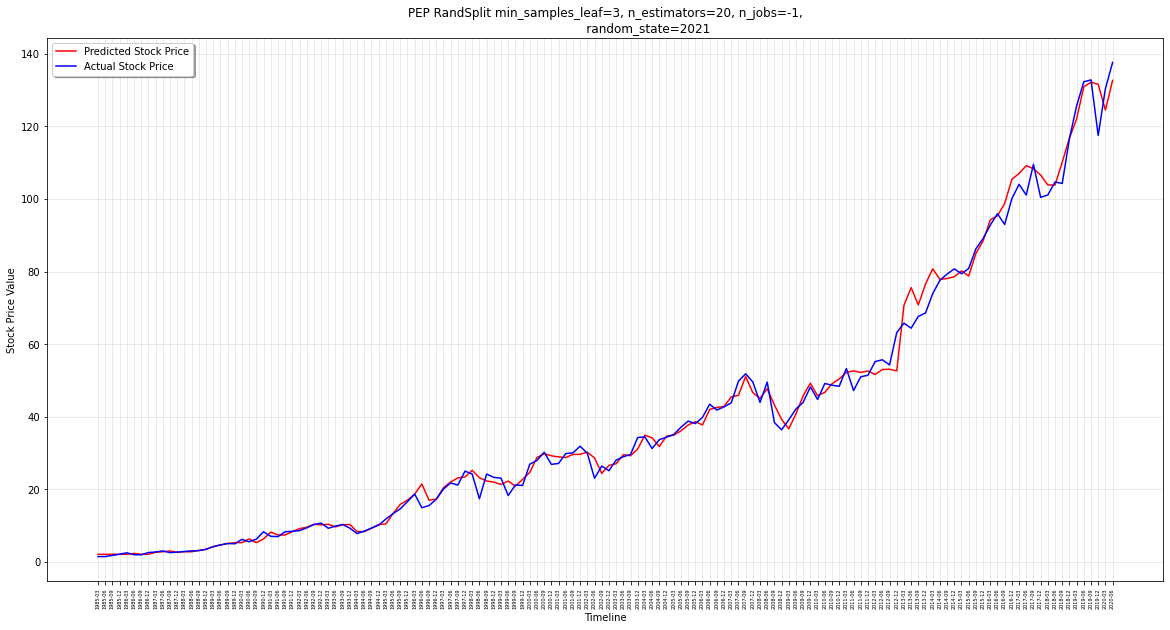

PEP MODEL RESULTS
 RMSE
 	Test: 3.6640425137616695
 MAPE
 	Test: 0.10566530931923429
 MAE
 	Test: 2.2979504000075788
 R2 Score Adj
 	Test: 0.9867850906479588



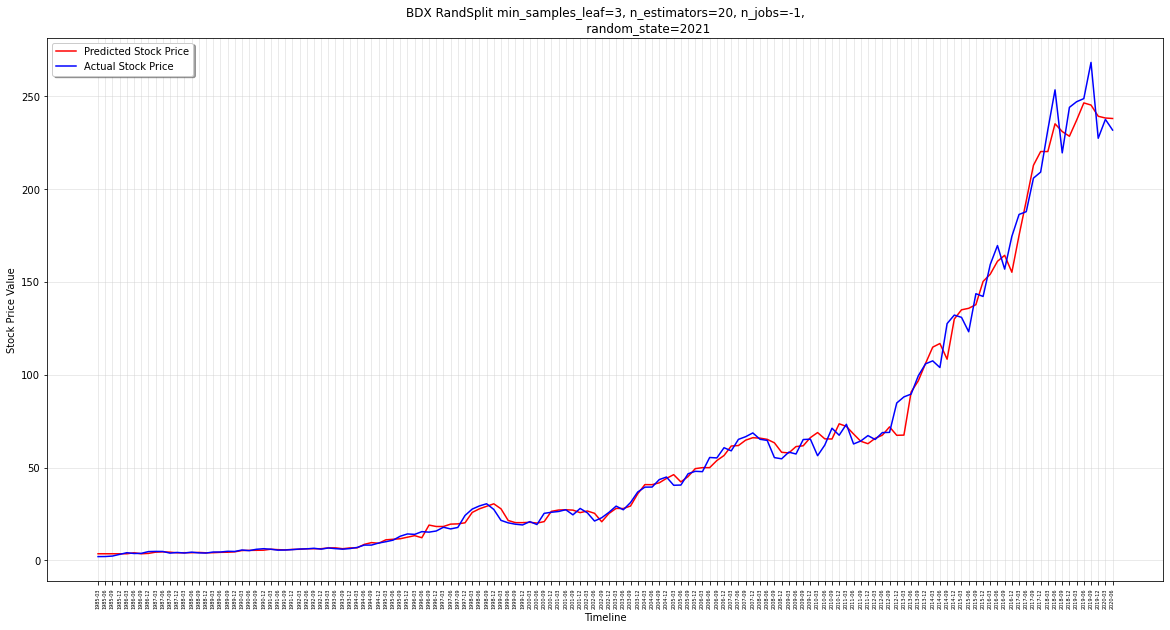

BDX MODEL RESULTS
 RMSE
 	Test: 7.483945317783413
 MAPE
 	Test: 0.1355916728912472
 MAE
 	Test: 4.3637699722721575
 R2 Score Adj
 	Test: 0.9854874524720181



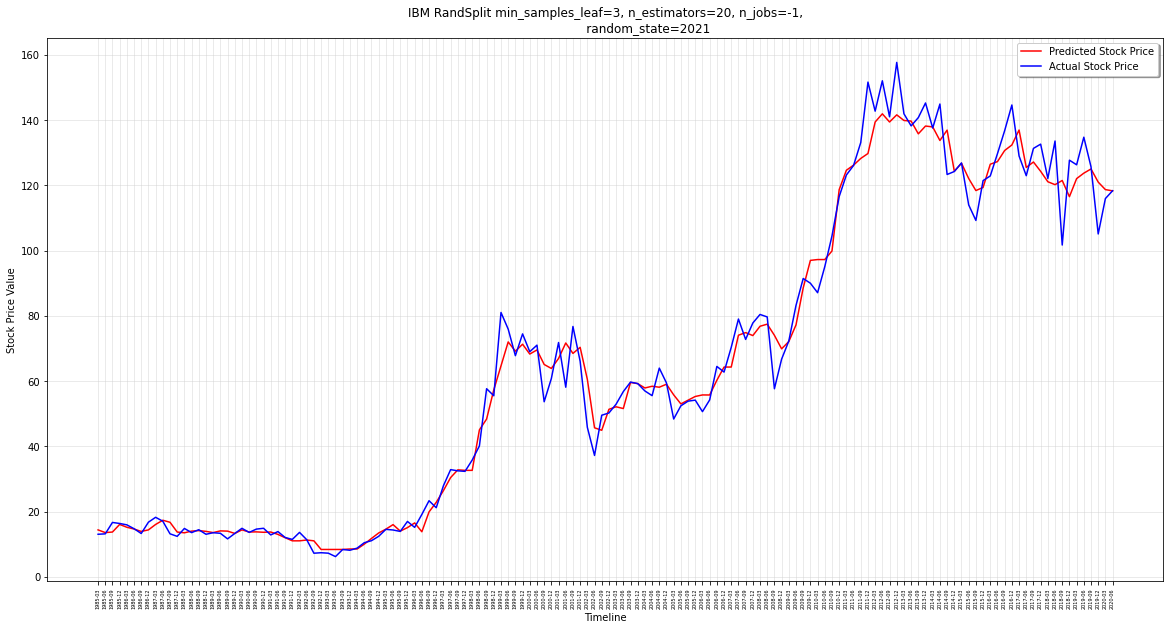

IBM MODEL RESULTS
 RMSE
 	Test: 7.552832805809715
 MAPE
 	Test: 0.10959884378065683
 MAE
 	Test: 4.966402770229433
 R2 Score Adj
 	Test: 0.9784350031301636



In [9]:
from lib.fundamental_lib import model_results_revised
#Best Params
#Params={'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'n_estimators': 30, 'oob_score': False}
#Params={'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 50, 'oob_score': False}
Params={'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 20, 'oob_score': False} #1
rf = RandomForestRegressor(bootstrap=True, n_jobs=-1, max_depth=Params['max_depth'], random_state=2021, min_samples_leaf=Params['min_samples_leaf'], max_features=Params['max_features'], n_estimators=Params['n_estimators'], oob_score=Params['oob_score'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_Manual_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_revised(datas[stock], rf, label=stock, scaling=False)

## 3.2 Random split - Scaled prediction variable

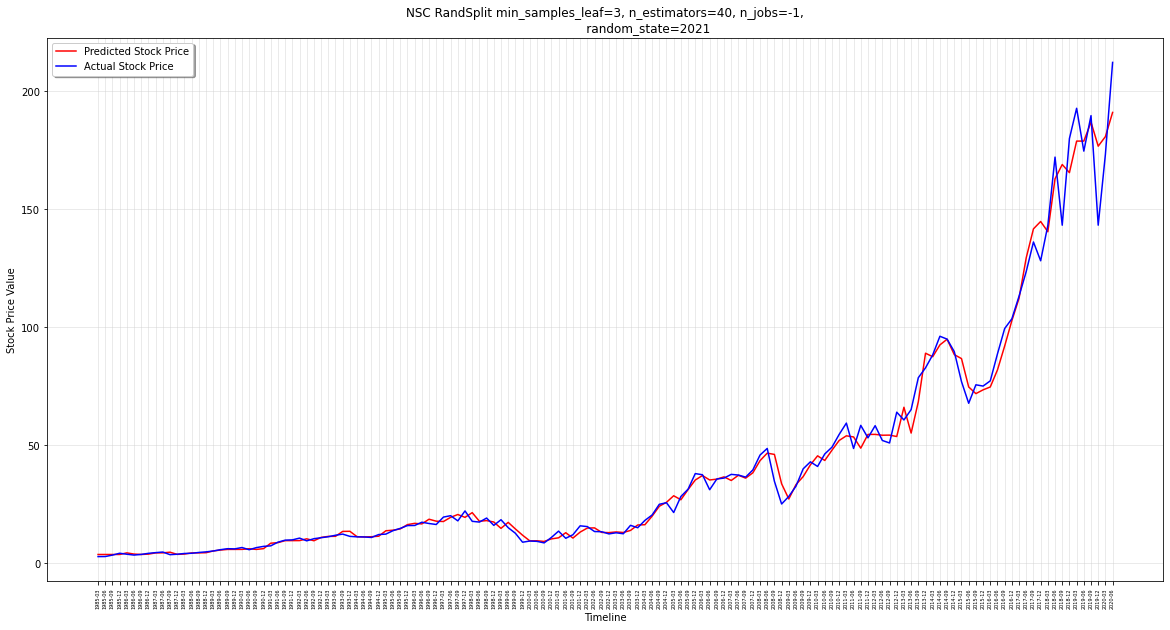

NSC MODEL RESULTS
 RMSE
 	Test: 4.750249090488462
 MAPE
 	Test: 0.11723688917909451
 MAE
 	Test: 3.064544333753216
 R2 Score Adj
 	Test: 0.9874832117768066



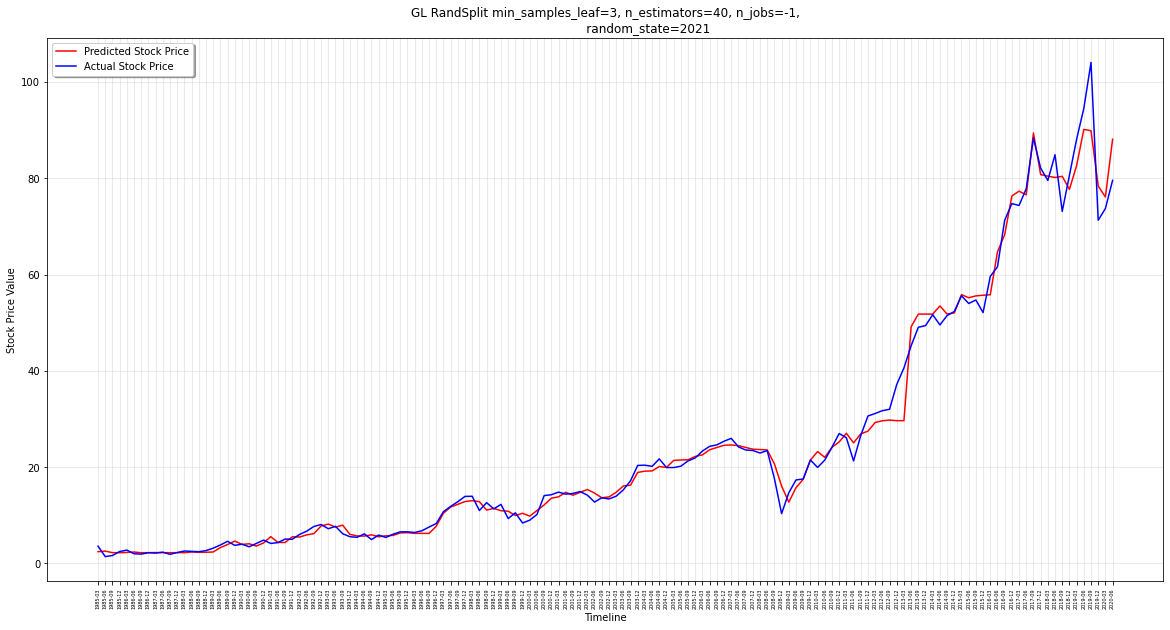

GL MODEL RESULTS
 RMSE
 	Test: 3.0797435379883003
 MAPE
 	Test: 0.13761446512380088
 MAE
 	Test: 1.9705958048956156
 R2 Score Adj
 	Test: 0.9821476779437002



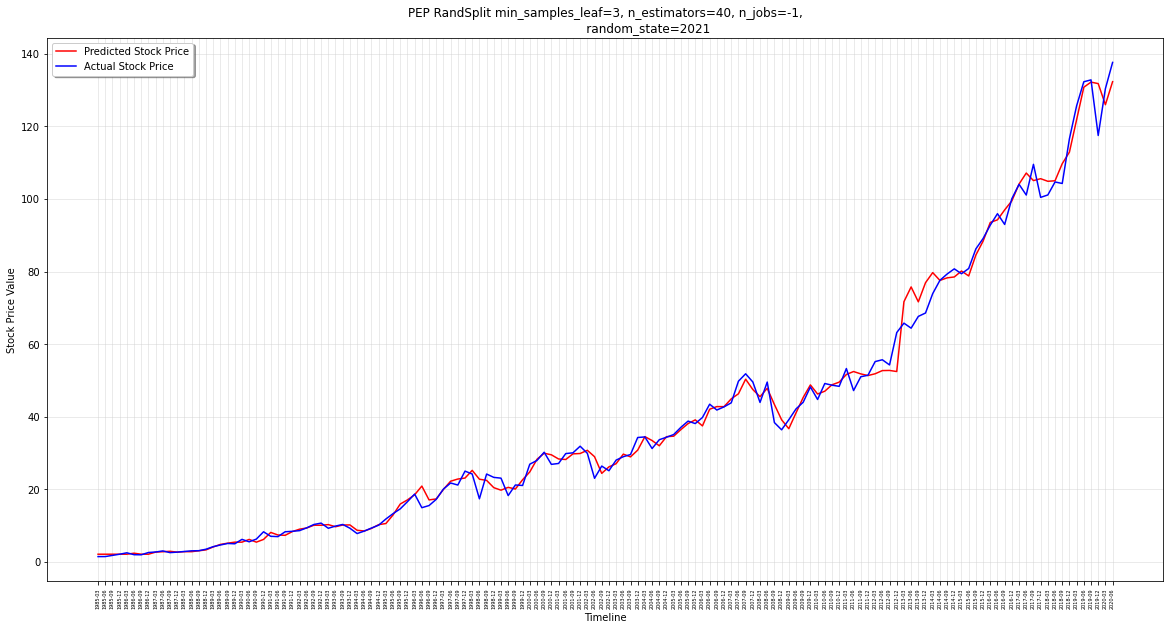

PEP MODEL RESULTS
 RMSE
 	Test: 3.6888950344604816
 MAPE
 	Test: 0.1053612734311605
 MAE
 	Test: 2.270667982901562
 R2 Score Adj
 	Test: 0.9866052141176775



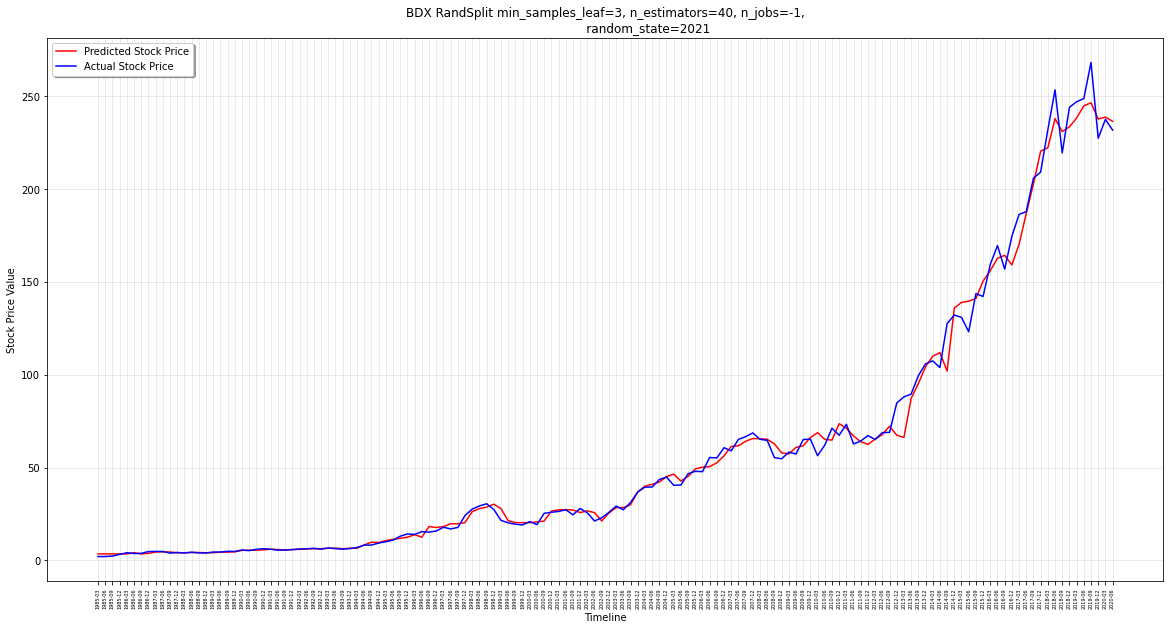

BDX MODEL RESULTS
 RMSE
 	Test: 7.168635537234296
 MAPE
 	Test: 0.12951418087127362
 MAE
 	Test: 4.244943007525095
 R2 Score Adj
 	Test: 0.9866845623451094



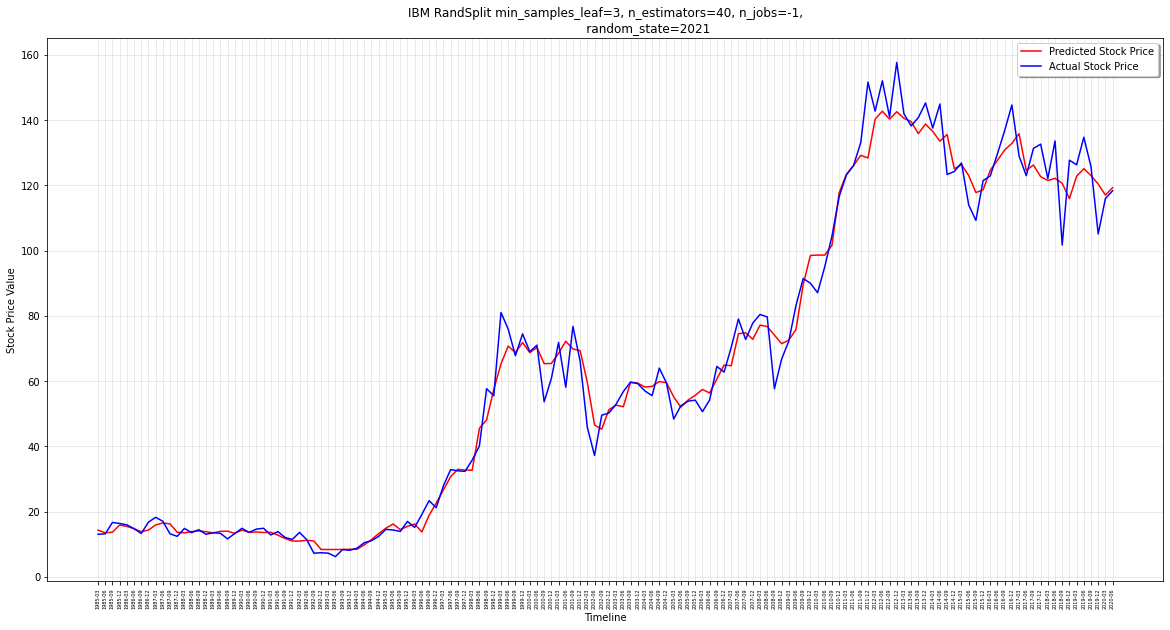

IBM MODEL RESULTS
 RMSE
 	Test: 7.605033744564552
 MAPE
 	Test: 0.10904957691529735
 MAE
 	Test: 4.894200896025249
 R2 Score Adj
 	Test: 0.9781358827184701



In [10]:
from lib.fundamental_lib import model_results_revised
#Best Params
#Params={'max_features': 'auto', 'n_estimators': 100}
#rf = RandomForestRegressor(bootstrap=True, n_jobs=-1, max_features=Params['max_features'], n_estimators=Params['n_estimators'])
#Params={'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 100, 'oob_score': True}
#Params={'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 50, 'oob_score': False}
Params={'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 40, 'oob_score': False} #bueno
#Params={'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 100, 'oob_score': True}
rf = RandomForestRegressor(bootstrap=True, n_jobs=-1, max_depth=Params['max_depth'], random_state=2021, min_samples_leaf=Params['min_samples_leaf'], max_features=Params['max_features'], n_estimators=Params['n_estimators'], oob_score=Params['oob_score'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_Manual_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_revised(datas[stock], rf, label=stock, scaling=True)

## 3.3 Sequential split - No scaled prediction variable

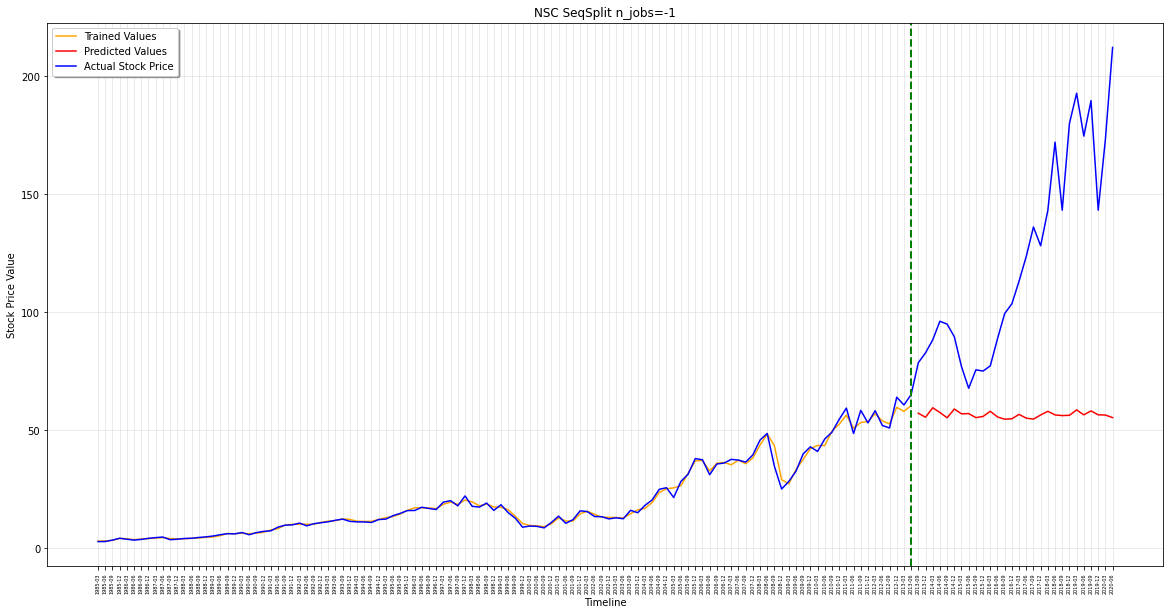

NSC MODEL RESULTS
 RMSE
 	Train: 1.584214815029922
 	Test: 83.75705347649587
 	Dataset: 37.74483581358495
 MAPE
 	Train: 0.04684491013853818
 	Test: 0.4890718385398048
 	Dataset: 0.13652729421991394
 R2 Score Adj
 	Train: 0.990513682075659
 	Test: -2.756756576863706
 	Dataset: 0.40144267769580677



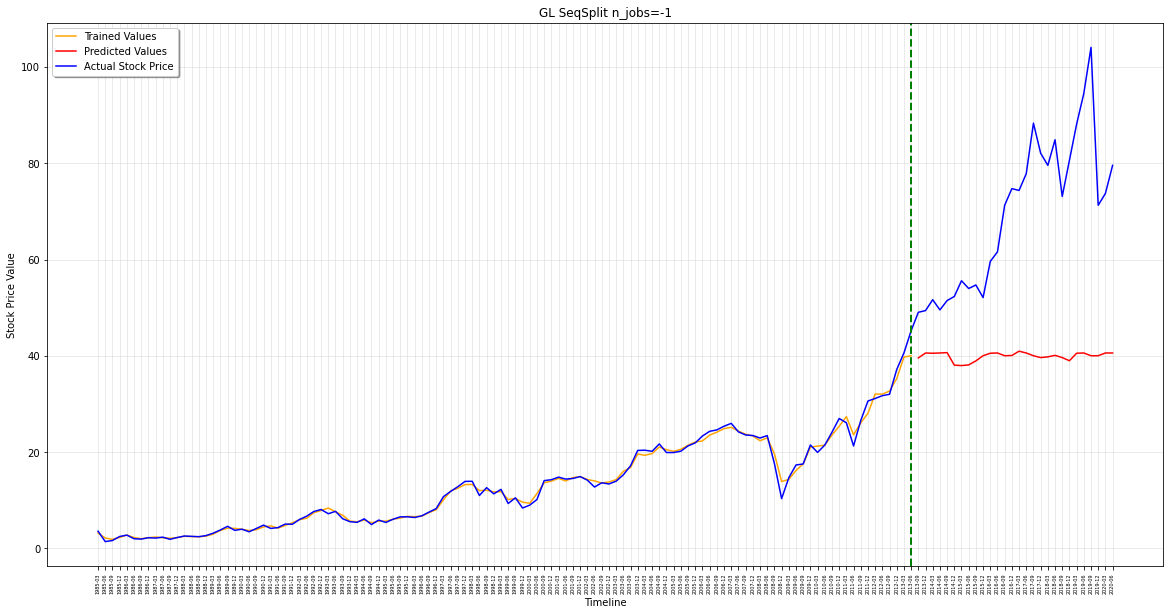

GL MODEL RESULTS
 RMSE
 	Train: 0.8910937355543906
 	Test: 33.93074274893703
 	Dataset: 15.300734768803466
 MAPE
 	Train: 0.050665317304623696
 	Test: 0.40041814220446237
 	Dataset: 0.12159421186473084
 R2 Score Adj
 	Train: 0.9908467555761132
 	Test: -4.395593329575184
 	Dataset: 0.6266588435904452



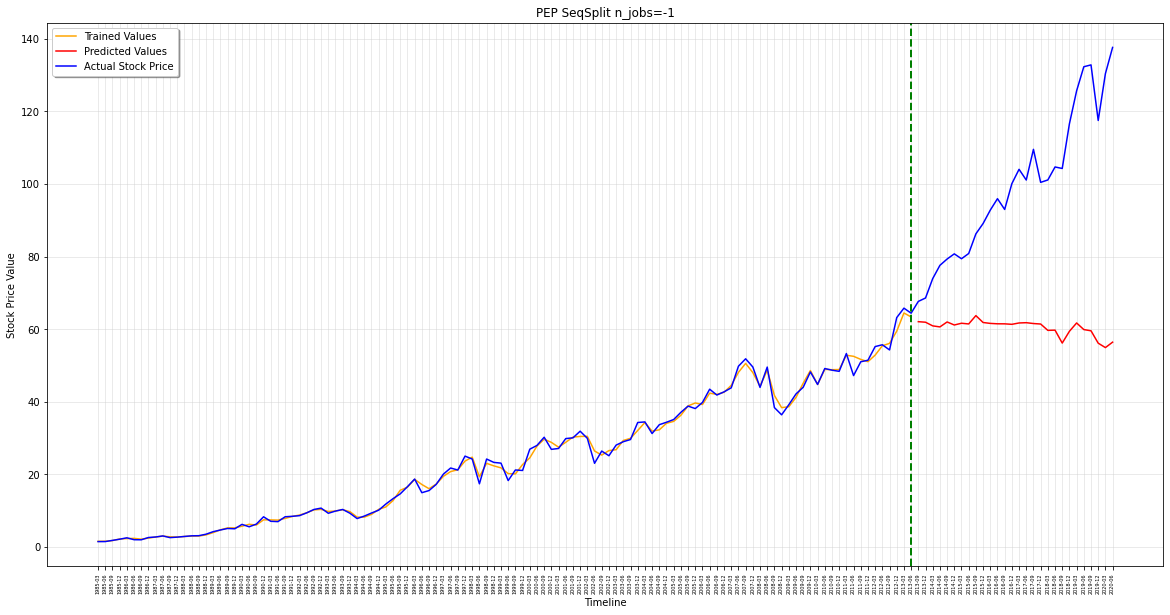

PEP MODEL RESULTS
 RMSE
 	Train: 1.1576152128416601
 	Test: 46.506034980450465
 	Dataset: 20.96855716635235
 MAPE
 	Train: 0.03880982435739387
 	Test: 0.37233643328984045
 	Dataset: 0.10644808770733061
 R2 Score Adj
 	Train: 0.9955593265262891
 	Test: -4.505195392590522
 	Dataset: 0.6483846094146481



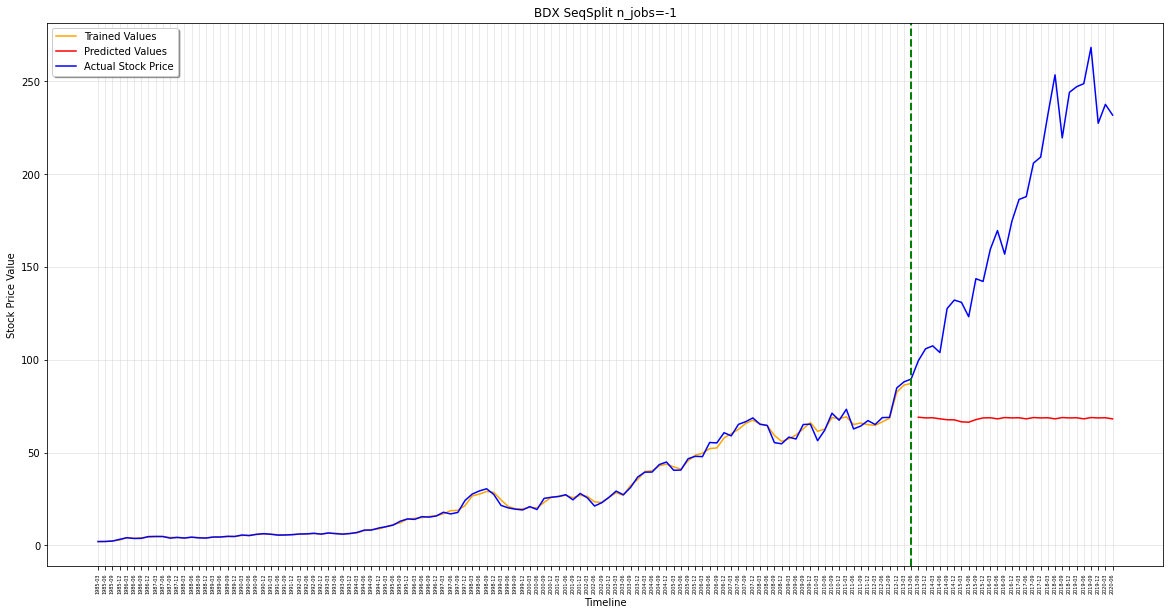

BDX MODEL RESULTS
 RMSE
 	Train: 1.349117790437574
 	Test: 126.86417422733187
 	Dataset: 57.143454367224315
 MAPE
 	Train: 0.03328541637213298
 	Test: 0.5906741081795837
 	Dataset: 0.14632228394147614
 R2 Score Adj
 	Train: 0.9968986868396856
 	Test: -5.610588330342139
 	Dataset: 0.3180592543726324



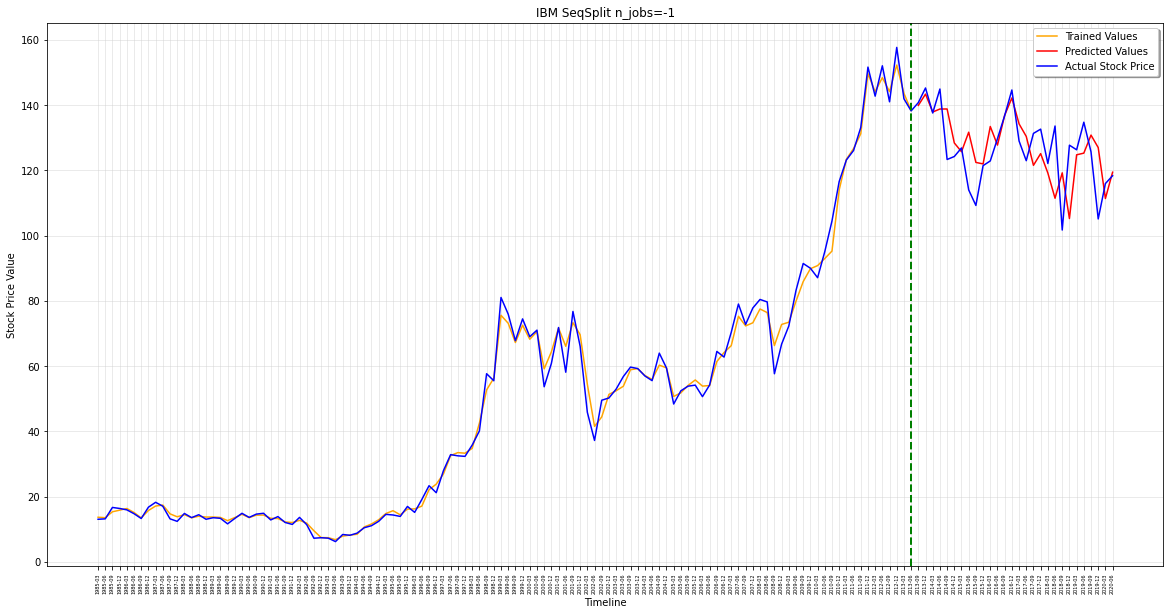

IBM MODEL RESULTS
 RMSE
 	Train: 2.681067174553152
 	Test: 10.33100128066726
 	Dataset: 5.232098251722887
 MAPE
 	Train: 0.04374962566670624
 	Test: 0.06267253152687777
 	Dataset: 0.047587138043943815
 R2 Score Adj
 	Train: 0.9951851349861326
 	Test: -0.04526592421373077
 	Dataset: 0.9873499098924461



In [17]:
from lib.fundamental_lib import model_results_seq
#Best Params
#Params={'max_features': 'auto', 'n_estimators': 100}
Params={'max_features': 'auto', 'n_estimators': 100}
rf = RandomForestRegressor(bootstrap=True, n_jobs=-1, max_features=Params['max_features'], n_estimators=Params['n_estimators'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_Manual_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_seq(data, rf, label=stock, scaling=False)

## 3.4 Random split - Scaled prediction variable

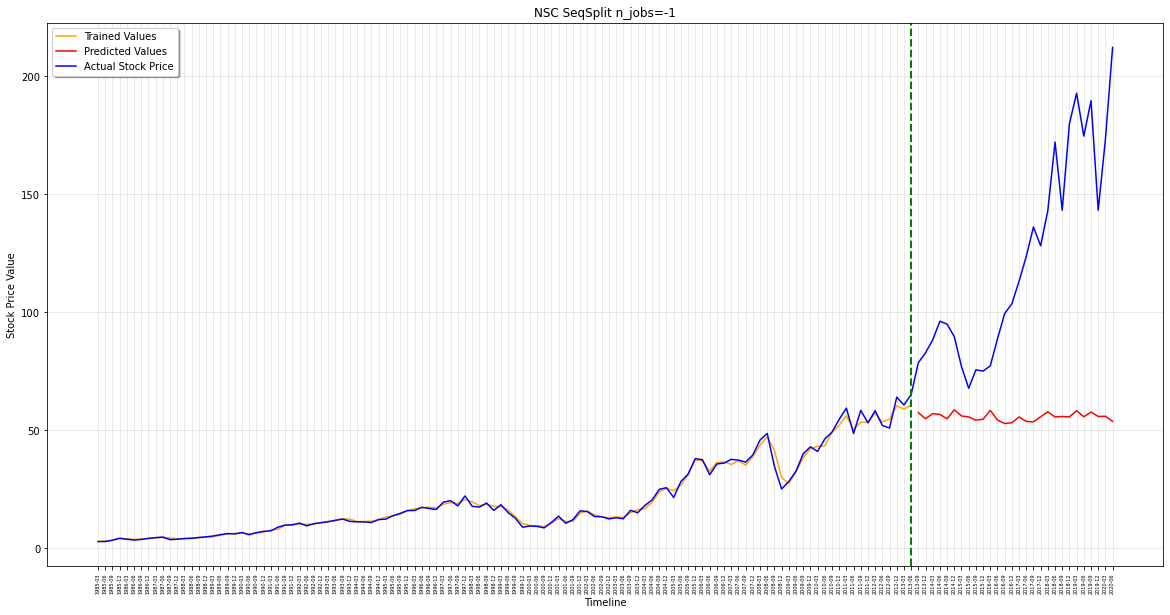

NSC MODEL RESULTS
 RMSE
 	Train: 1.4743592141669641
 	Test: 84.49458438473833
 	Dataset: 38.07321936757785
 MAPE
 	Train: 0.04543718062316135
 	Test: 0.49714456677882274
 	Dataset: 0.1370421750183654
 R2 Score Adj
 	Train: 0.9917837025874338
 	Test: -2.8232088436365963
 	Dataset: 0.39098236407487164



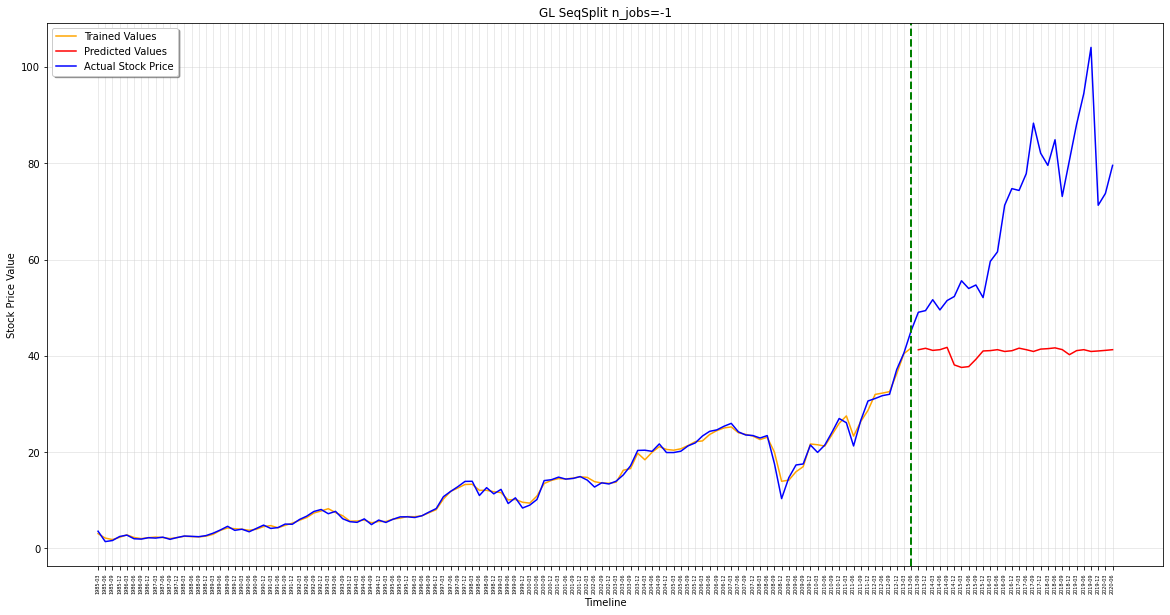

GL MODEL RESULTS
 RMSE
 	Train: 0.7938207521029711
 	Test: 33.12967880397945
 	Dataset: 14.93611808894029
 MAPE
 	Train: 0.04919974067666826
 	Test: 0.388444061382883
 	Dataset: 0.11799753998072574
 R2 Score Adj
 	Train: 0.9927360445041442
 	Test: -4.143833787341527
 	Dataset: 0.6442402823868532



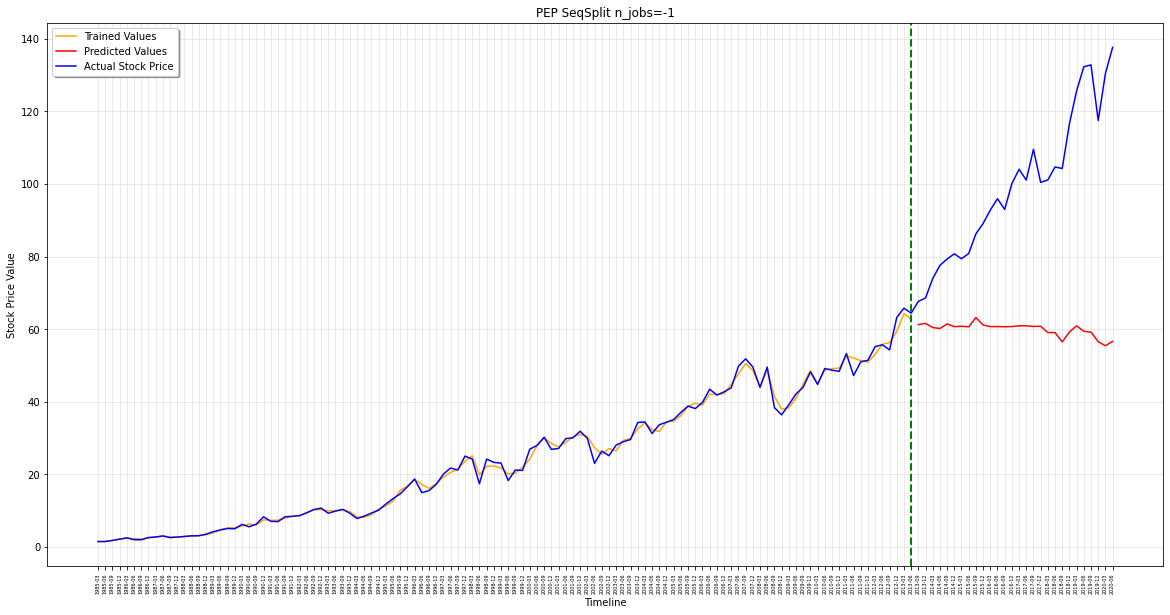

PEP MODEL RESULTS
 RMSE
 	Train: 1.200374621891754
 	Test: 46.85945372385783
 	Dataset: 21.129422400208743
 MAPE
 	Train: 0.04026806254190704
 	Test: 0.37773444845239845
 	Dataset: 0.10870530164263607
 R2 Score Adj
 	Train: 0.9952252130350676
 	Test: -4.5891858725544745
 	Dataset: 0.6429689140377516



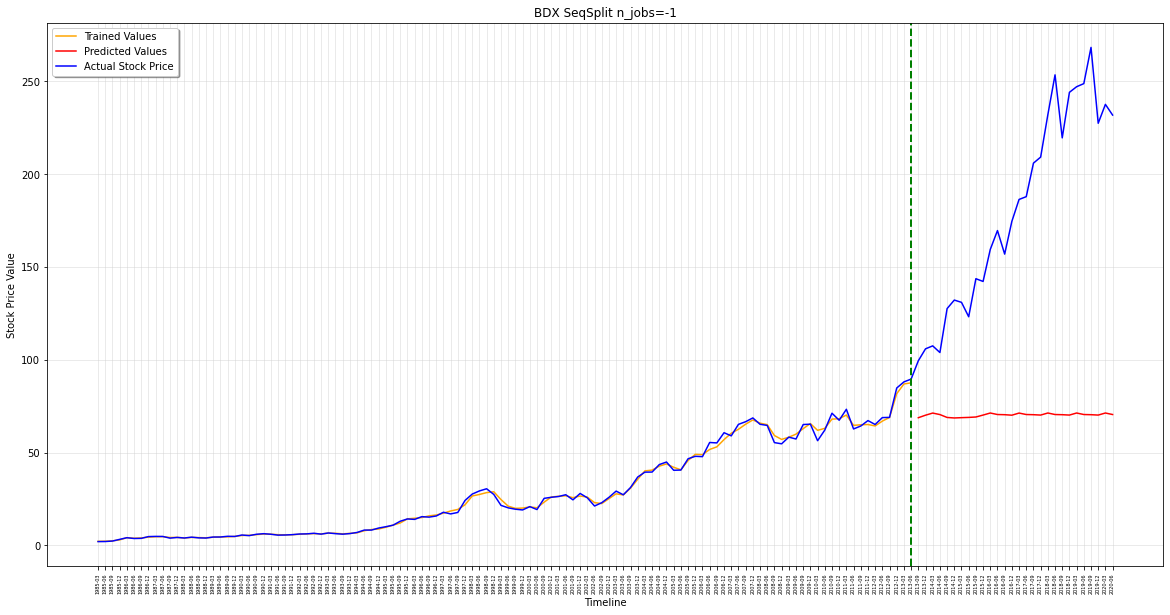

BDX MODEL RESULTS
 RMSE
 	Train: 1.3896817465018825
 	Test: 125.09613910826947
 	Dataset: 56.348220237635495
 MAPE
 	Train: 0.034973063309304
 	Test: 0.5798264880408117
 	Dataset: 0.14546781377932994
 R2 Score Adj
 	Train: 0.9967093886620744
 	Test: -5.427616115227775
 	Dataset: 0.3369075755863925



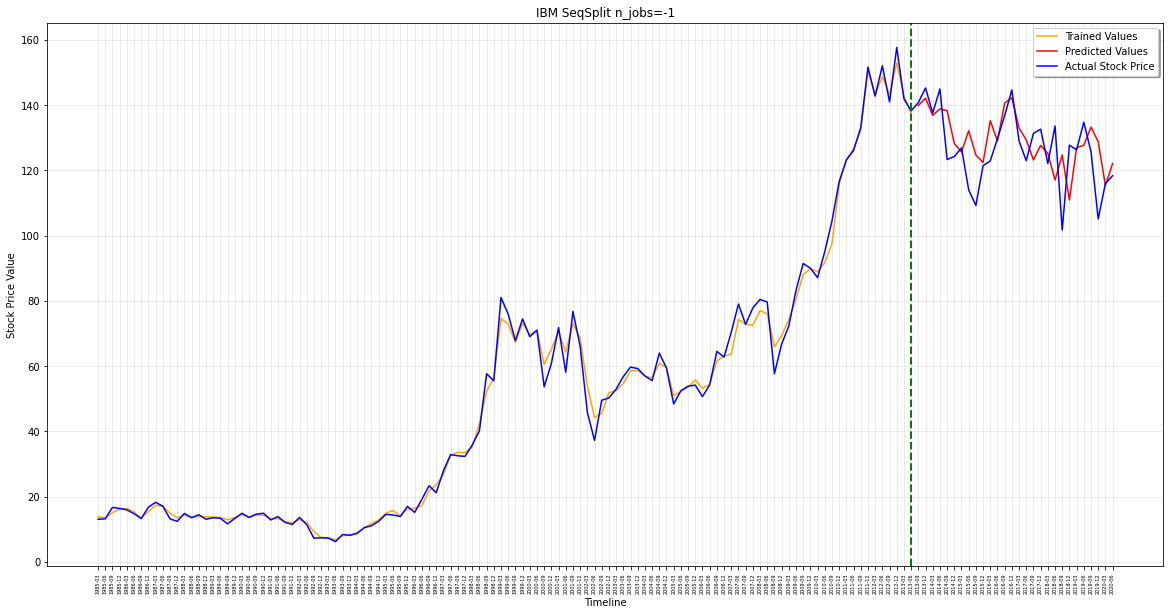

IBM MODEL RESULTS
 RMSE
 	Train: 2.576070136813588
 	Test: 10.100438230289322
 	Dataset: 5.097007471651407
 MAPE
 	Train: 0.04282800558545758
 	Test: 0.061115018315872426
 	Dataset: 0.04653656061470255
 R2 Score Adj
 	Train: 0.995554873841403
 	Test: 0.0008690877231706251
 	Dataset: 0.9879947176733647



In [12]:
from lib.fundamental_lib import model_results_seq
#Best Params
Params={'max_features': 'auto', 'n_estimators': 100}
#Params={'max_features': 'auto', 'n_estimators': 50}
rf = RandomForestRegressor(bootstrap=True, n_jobs=-1, max_features=Params['max_features'], n_estimators=Params['n_estimators'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_Manual_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_seq(data, rf, label=stock, scaling=True)